In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [10]:
import pandas as pd
df = pd.read_csv("tripdata_cleaned.csv")
df.head()
# df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\traveltripdata.csv")

Timestamp             Name  What is your age?  \
0   2025/11/16 5:27:37 pm GMT+5:30      Shailendra                  20   
1   2025/11/16 5:42:32 pm GMT+5:30  E Mahitha Renu                  19   
2   2025/11/16 6:10:44 pm GMT+5:30        Pavithra                  20   
3  2025/11/16 10:14:20 pm GMT+5:30   Chede Raviteja                 31   
4   2025/11/23 9:44:03 pm GMT+5:30          Navneet                 20   

  What is your gender? Where are you from?  What do you do currently?  \
0                 Male      Uttar pradesh                     Student   
1               Female      Andhra Pradesh                    Student   
2               Female             haryana                    Student   
3                 Male          tamil nadu                    Farmer    
4                 Male              punjab                    Student   

  What is your approximate monthly travel or personal spending budget?  \
0                                 Less than â‚¹1,000                     
1                              â‚¹1,000 â€“ â‚¹3,000                     
2                              â‚¹1,000 â€“ â‚¹3,000                     
3                                    Above â‚¹15,000                     
4                              â‚¹3,000 â€“ â‚¹7,000                     

  Which place did you visit recently? What type of trip was it?  \
0                           Amritsar                       Solo   
1                            Amritsar              Friends trip   
2                          Jalandhar               Friends trip   
3                           Tirupathi               Family trip   
4                              Punjab                      Solo   

    How many days did the trip last?  ...  \
0                                  1  ...   
1                                  1  ...   
2                                  1  ...   
3                                  1  ...   
4                                  1  ...   

  How would you describe your stay/hotel experience?  \
0                                            Average   
1                                               Good   
2                                            Average   
3                                               Good   
4                                            Average   

  How was the food during your trip?  \
0                    Could be better   
1                               Okay   
2                    Could be better   
3                              Tasty   
4                    Could be better   

    How safe did you feel at the destination?  \
0                                           5   
1                                           1   
2                                           3   
3                                           5   
4                                           3   

  Rate the local transportation experience.  \
0                                         4   
1                                         1   
2                                         3   
3                                         5   
4                                         4   

   How good were the sightseeing places?  \
0                                      5   
1                                      1   
2                                      3   
3                                      3   
4                                      3   

  Overall, how satisfied were you with the trip?  \
0                                              4   
1                                              1   
2                                              3   
3                                              5   
4                                              3   

   Would you like to revisit the same destination?  \
0                                              Yes   
1                                              Yes   
2                                              Yes   
3                                              Yes   
4                 

In [11]:
df.columns = df.columns.str.replace('\\s+', ' ', regex=True).str.strip()
df = df.rename(columns={
    'Which place did you visit recently?': 'place',
    'Which month did you travel?': 'month',
    'In Which season do you visited?': 'season',
    'How many days did the trip last?': 'days',
    'How would you describe your stay/hotel experience?': 'hotel',
    'What was your approximate total trip budget (in rupees)?': 'cost'
})

In [12]:
df = df[['place', 'month', 'season', 'hotel', 'days', 'cost']]

df['cost'] = (
    df['cost']
    .astype(str)
    .str.replace(',', '')
    .str.replace('₹', '')
    .str.replace('k', '000', regex=False)
)

df['cost'] = pd.to_numeric(df['cost'], errors='coerce')
df = df.dropna()


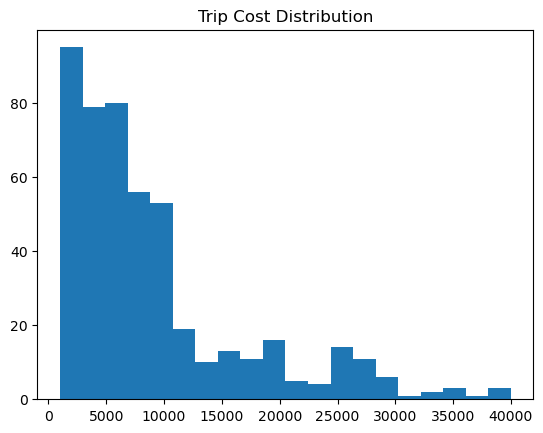

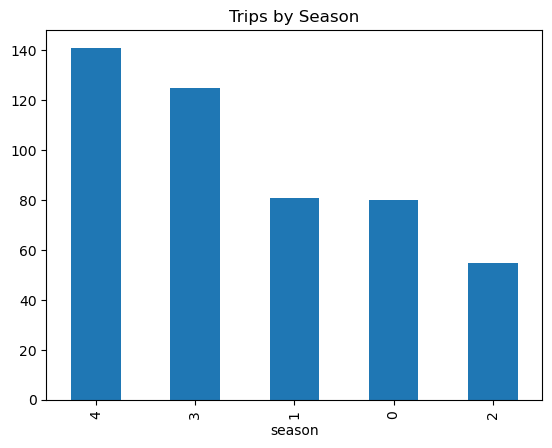

In [13]:
# obj_cols = df.select_dtypes(include="object").columns
# df[obj_cols] = df[obj_cols].apply(lambda x: x.str.lower().str.strip())
# print(df)
# print("Shape of Dataset (rows, columns):")
# print(df.shape)
# print("Column Names:")
# print(df.columns.tolist())
# print("Dataset Info:")
# print(df.info())
# print("Missing Values in Each Column:")
# print(df.isnull().sum())

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


encoders = {}

for col in ['place', 'month', 'season', 'hotel']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str).str.lower())
    encoders[col] = le



plt.hist(df['cost'], bins=20)
plt.title("Trip Cost Distribution")
plt.show()

df['season'].value_counts().plot(kind='bar')
plt.title("Trips by Season")
plt.show()


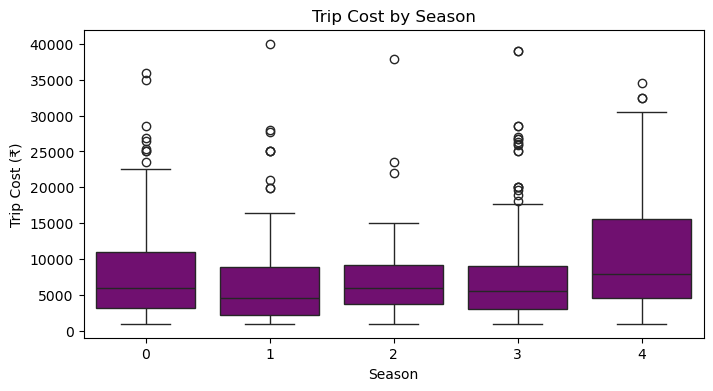

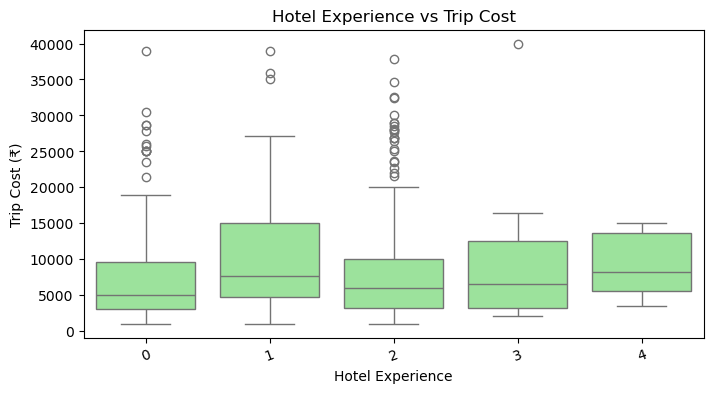

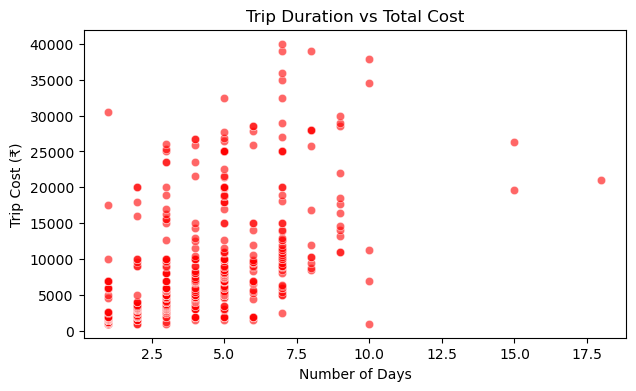

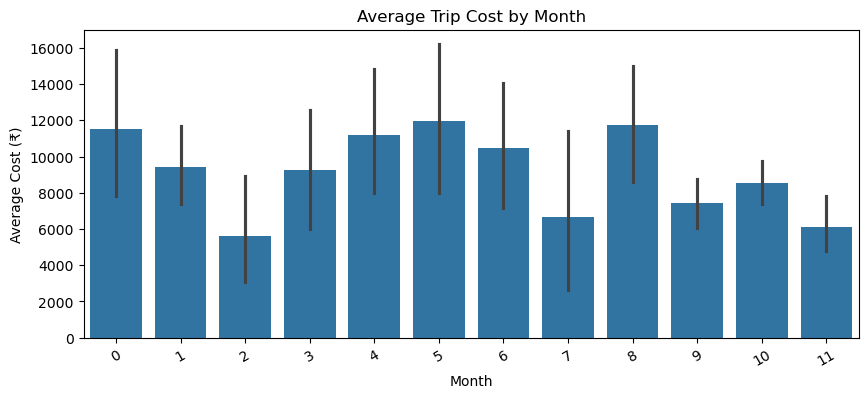

In [14]:
import seaborn as sns
import numpy as np
plt.figure(figsize=(8,4))
sns.histplot(df['cost'], bins=20, kde=True, color='orange')
plt.title("Distribution of Total Trip Cost")
plt.xlabel("Trip Cost (₹)")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(8,4))
sns.boxplot(x='season', y='cost', data=df, color='purple')
plt.title("Trip Cost by Season")
plt.xlabel("Season")
plt.ylabel("Trip Cost (₹)")
plt.show()


plt.figure(figsize=(8,4))
sns.boxplot(x='hotel', y='cost', data=df, color='lightgreen')
plt.title("Hotel Experience vs Trip Cost")
plt.xlabel("Hotel Experience")
plt.ylabel("Trip Cost (₹)")
plt.xticks(rotation=20)
plt.show()



plt.figure(figsize=(7,4))
sns.scatterplot(x='days', y='cost', data=df, alpha=0.6, color='red')
plt.title("Trip Duration vs Total Cost")
plt.xlabel("Number of Days")
plt.ylabel("Trip Cost (₹)")
plt.show()



plt.figure(figsize=(10,4))
sns.barplot(x='month', y='cost', data=df, estimator=np.mean)
plt.title("Average Trip Cost by Month")
plt.xlabel("Month")
plt.ylabel("Average Cost (₹)")
plt.xticks(rotation=30)
plt.show()


In [15]:
X = df[['place', 'month', 'season', 'hotel', 'days']]
y = df['cost']
X_train=X
y_train=y

In [16]:
from sklearn.model_selection import train_test_split

# Features and target
X = df[['place', 'month', 'season', 'hotel', 'days']]
y = df['cost']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,     # 80% train, 20% test
    random_state=42    # reproducibility
)

# Quick check
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(385, 5) (97, 5)
(385,) (97,)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print(f"\n{name}")
    print("MAE :", round(mae, 2))
    print("R²  :", round(r2, 3))



Linear Regression
MAE : 5535.74
R²  : 0.285

Decision Tree
MAE : 4849.31
R²  : 0.282

Random Forest
MAE : 4725.69
R²  : 0.465


In [18]:
def predict_cost(place, month, season, hotel, days):
    data = pd.DataFrame([{
        'place': encoders['place'].transform([place.lower()])[0],
        'month': encoders['month'].transform([month.lower()])[0],
        'season': encoders['season'].transform([season.lower()])[0],
        'hotel': encoders['hotel'].transform([hotel.lower()])[0],
        'days': days
    }])

    return int(model.predict(data)[0])


In [21]:
rf = models["Random Forest"]

import joblib
joblib.dump(rf, "trip_cost_model.pkl")
joblib.dump(encoders, "label_encoders.pkl")


['label_encoders.pkl']

In [ ]:
!pip install gradio
import gradio as gr
import joblib
import pandas as pd

# Load the saved model and encoders
model = joblib.load("trip_cost_model.pkl")
encoders = joblib.load("label_encoders.pkl")

# Get unique labels for dropdown options (to ensure valid inputs)
def get_unique_labels(col):
    return sorted(encoders[col].classes_)

place_options = get_unique_labels('place')
month_options = get_unique_labels('month')
season_options = get_unique_labels('season')
hotel_options = get_unique_labels('hotel')

def predict_cost(place, month, season, hotel, days):
    # Encode categorical inputs
    try:
        place_enc = encoders['place'].transform([place])[0]
        month_enc = encoders['month'].transform([month])[0]
        season_enc = encoders['season'].transform([season])[0]
        hotel_enc = encoders['hotel'].transform([hotel])[0]
    except ValueError as e:
        return "Error: Invalid input value. Please select from the provided options."

    # Create input dataframe
    input_data = pd.DataFrame([{
        'place': place_enc,
        'month': month_enc,
        'season': season_enc,
        'hotel': hotel_enc,
        'days': days
    }])

    # Predict
    prediction = model.predict(input_data)[0]
    return f"Estimated Trip Cost: ₹{int(prediction):,}"

# Gradio Interface
with gr.Blocks(title="Trip Cost Predictor") as demo:
    gr.Markdown("## 🧳 Trip Cost Prediction")
    gr.Markdown("Enter your trip details to estimate the total cost in Indian Rupees (₹).")

    with gr.Row():
        place = gr.Dropdown(choices=place_options, label="Place Visited", value=place_options[0])
        month = gr.Dropdown(choices=month_options, label="Travel Month", value=month_options[0])
        season = gr.Dropdown(choices=season_options, label="Season", value=season_options[0])
        hotel = gr.Dropdown(choices=hotel_options, label="Hotel Experience", value=hotel_options[0])
        days = gr.Number(label="Trip Duration (Days)", value=3, minimum=1, step=1)

    btn = gr.Button("Predict Cost")
    output = gr.Textbox(label="Prediction Result")

    btn.click(fn=predict_cost, inputs=[place, month, season, hotel, days], outputs=output)

# Launch the app
if __name__ == "__main__":
    demo.launch()